# Python Implement of CSCV procedure
## tools including:
* pandas: handy data table manipulation
* numpy: for some numeric usage
* scipy.stat: for regression model
* matplotlib: for data visualization
* seaborn: for more beautiful visualization

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pylab as plt
import seaborn as sns
import itertools

In [65]:
# Step 1: Collect a matrix M of performance time series from each strategy
n = 100
t = 1000
m = pd.DataFrame(np.random.normal(0, 1, n*t).reshape(t, n)) # generate a return time series form normal distribution
m.index = pd.bdate_range(start='2000-01-01', periods=t) # row is the business day
m.columns = 'Strategy' + (m.columns).map(str) # columns is the index of strategy
m.head()

,Strategy0,Strategy1,Strategy2,Strategy3,Strategy4,Strategy5,Strategy6,Strategy7,Strategy8,Strategy9,Strategy10,Strategy11,Strategy12,Strategy13,Strategy14,Strategy15,Strategy16,Strategy17,Strategy18,Strategy19,
2000-01-03,-0.865880,1.726792,-0.746234,-0.319732,-0.819634,-2.017977,1.447558,0.815166,-0.378973,-0.381220,1.254613,0.654779,0.531880,1.197857,-0.460145,-1.437463,-1.417545,1.494771,-1.003547,0.524813,...
2000-01-04,-0.462055,1.124819,1.542521,-0.806706,-0.550678,1.330021,1.330800,1.288748,-1.628560,0.819660,0.586542,-0.623228,0.744362,0.663443,0.395751,-0.089553,-0.454663,1.260853,1.446230,0.893558,...
2000-01-05,-0.190779,-2.802654,-1.390751,0.454589,-0.061618,0.441971,-0.313597,-0.455606,-0.421605,-0.121395,0.536056,-2.959601,1.103936,-1.468817,-0.570794,-0.150303,0.019475,2.382445,-0.523384,0.701685,...
2000-01-06,-0.731602,-0.252148,0.439109,-0.501852,-1.120145,0.483587,-0.438359,-0.182050,1.697935,1.171330,1.373356,1.338990,0.981062,1.023124,-0.078750,1.228677,0.044935,2.000642,-1.178458,0.674528,...
2000-01-07,-0.444559,-0.413896,0.618147,-0.768336,-0.830877,0.707700,0.296623,-0.815511,-0.093104,-0.176839,0.203383,-1.099975,-0.767406,-0.340356,0.577692,-1.827664,1.755188,-0.423835,0.529553,-0.799772,...


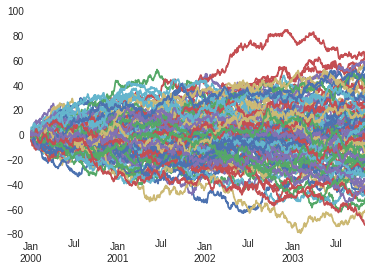

In [66]:
# how's the performance of  the 100 strategies?
m.cumsum().plot(legend=False)

In [67]:
# Step 2: Split M into S=8 disjoint submatrices called Ms
s = 8
size = t/s #size=125
#m.index = m.index.map(lambda x: str(x)[:10]) # for plot
m_part = { idx: m.ix[0+size*(idx-1) :size*idx,]  for idx in range(1, s+1) }
m_part

{1:             Strategy0  Strategy1  Strategy2  Strategy3  Strategy4  Strategy5  \
 2000-01-03  -0.865880   1.726792  -0.746234  -0.319732  -0.819634  -2.017977   
 2000-01-04  -0.462055   1.124819   1.542521  -0.806706  -0.550678   1.330021   
 2000-01-05  -0.190779  -2.802654  -1.390751   0.454589  -0.061618   0.441971   
 2000-01-06  -0.731602  -0.252148   0.439109  -0.501852  -1.120145   0.483587   
 2000-01-07  -0.444559  -0.413896   0.618147  -0.768336  -0.830877   0.707700   
 2000-01-10  -0.645010  -0.318782   0.311736   1.044305   0.170029   1.285141   
 2000-01-11  -0.488950   1.228822   0.796386  -0.443486  -1.406959   2.171217   
 2000-01-12   0.845108  -0.237942   1.779249   0.836043  -1.031495  -1.061647   
 2000-01-13  -1.126995  -1.979121   1.214660   1.164537  -2.043170   0.337549   
 2000-01-14  -1.185189   1.298261   1.564515  -1.078721   0.379865  -1.147135   
 2000-01-17  -0.179960  -0.251419  -0.216381   0.459680  -1.025672   0.709981   
 2000-01-18  -0.164090  -

In [74]:
# Step 3: Generate all combination Cs from Ms
all_partition = m_part.keys()
cs = itertools.combinations(all_partition, len(all_partition)/2) # 2 = 8
cs = list(cs)
print "[Number of trilas] %s \n" % len(cs)
print cs

[Number of trilas] 70 

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 3, 7), (1, 2, 3, 8), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 4, 7), (1, 2, 4, 8), (1, 2, 5, 6), (1, 2, 5, 7), (1, 2, 5, 8), (1, 2, 6, 7), (1, 2, 6, 8), (1, 2, 7, 8), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 4, 7), (1, 3, 4, 8), (1, 3, 5, 6), (1, 3, 5, 7), (1, 3, 5, 8), (1, 3, 6, 7), (1, 3, 6, 8), (1, 3, 7, 8), (1, 4, 5, 6), (1, 4, 5, 7), (1, 4, 5, 8), (1, 4, 6, 7), (1, 4, 6, 8), (1, 4, 7, 8), (1, 5, 6, 7), (1, 5, 6, 8), (1, 5, 7, 8), (1, 6, 7, 8), (2, 3, 4, 5), (2, 3, 4, 6), (2, 3, 4, 7), (2, 3, 4, 8), (2, 3, 5, 6), (2, 3, 5, 7), (2, 3, 5, 8), (2, 3, 6, 7), (2, 3, 6, 8), (2, 3, 7, 8), (2, 4, 5, 6), (2, 4, 5, 7), (2, 4, 5, 8), (2, 4, 6, 7), (2, 4, 6, 8), (2, 4, 7, 8), (2, 5, 6, 7), (2, 5, 6, 8), (2, 5, 7, 8), (2, 6, 7, 8), (3, 4, 5, 6), (3, 4, 5, 7), (3, 4, 5, 8), (3, 4, 6, 7), (3, 4, 6, 8), (3, 4, 7, 8), (3, 5, 6, 7), (3, 5, 6, 8), (3, 5, 7, 8), (3, 6, 7, 8), (4, 5, 6, 7), (4, 5, 6, 8), (4, 5, 7, 8), (4, 6, 7, 8), (5, 6, 7,

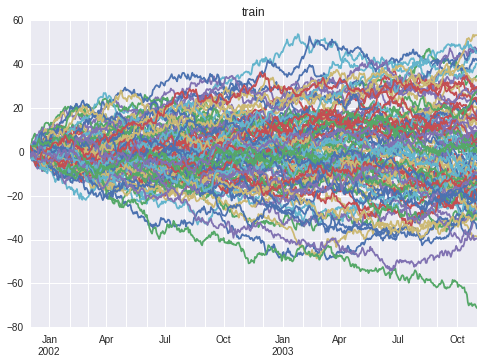

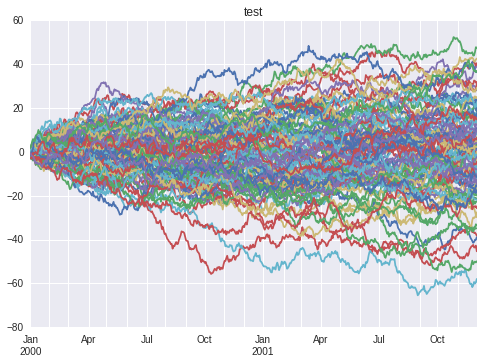

In [32]:
# Step 4: compute In-sample & Out-of-sample performance measure, like Sharpe ratio here
#for each c in cs
c_ = cs[69] # last training set 
train_set = pd.concat([m_part[idx] for idx in c_])# combined by (5, 6, 7, 8)
test_set = pd.concat([m_part[idx] for idx in all_partition if idx not in c_])# combined by (1, 2, 3, 4);
train_set.cumsum().plot(legend=False, title='train')
test_set.cumsum().plot(legend=False, title='test')

In [33]:
def mySharpeRatio(return_series, rf=0):
    return (np.mean(return_series)-rf)/np.std(return_series)

$\text{Let } ret_f: \text{ risk-free rate} $
$$\text{Sharp ratio} = \frac{mean(ret) - ret_f}{ std(ret)}$$
<p>That is, how much return I can get if I take 1 unit of risk in the form of standard deviation</p>
The higher the better.

In [34]:
#compute in-sample SR & out-of-sample SR (or any other measure)
is_perf = train_set.apply(mySharpeRatio, axis=0)
oos_perf = test_set.apply(mySharpeRatio, axis=0)
is_perf

Strategy0    -0.018232
Strategy1    -0.038106
Strategy2    -0.027360
Strategy3     0.014142
Strategy4    -0.016197
Strategy5    -0.035790
Strategy6    -0.057574
Strategy7     0.072123
Strategy8    -0.023146
Strategy9     0.009651
Strategy10    0.026638
Strategy11    0.088662
Strategy12   -0.003290
Strategy13    0.048546
Strategy14   -0.021990
...
Strategy85    0.055548
Strategy86    0.012391
Strategy87   -0.079364
Strategy88   -0.052530
Strategy89   -0.006995
Strategy90   -0.026339
Strategy91   -0.029605
Strategy92   -0.025967
Strategy93   -0.017500
Strategy94    0.069484
Strategy95   -0.004373
Strategy96   -0.040302
Strategy97   -0.000632
Strategy98    0.060670
Strategy99    0.022161
Length: 100, dtype: float64

In [38]:
# find the strategy that is optimal in-sample, and its corresponding OOS SR.
best_is_strategy = np.argmax(is_perf)
best_oos_strategy = np.argmax(oos_perf)
print """
[best in-sample strategy] %s
[in-sample SR] %s
[out-of-sample SR] %s
""" % (best_is_strategy, is_perf[best_is_strategy], oos_perf[best_is_strategy])


[best in-sample strategy] Strategy76
[in-sample SR] 0.106872716629
[out-of-sample SR] 0.00923774066544



In [39]:
# get the relative rank r_bar of OOS SR
is_rank = is_perf.argsort().argsort()
oos_rank = oos_perf.argsort().argsort()# rank the 
rel_oos_rank = oos_rank/ float(len(oos_rank))

print """
[best in-sample strategy] %s
[rank of in-sample SR] %s
[rank of out-of-sample SR] %s
[relative rank of out-of-sample SR] %s
""" % (best_is_strategy, is_rank[best_is_strategy], oos_rank[best_is_strategy], rel_oos_rank[best_is_strategy])


[best in-sample strategy] Strategy76
[rank of in-sample SR] 99
[rank of out-of-sample SR] 59
[relative rank of out-of-sample SR] 0.59



Let $r = \frac{rank_{oos}}{N}$ be the relative rank
$$\lambda_c  = \ln(\frac{r}{1-r})$$

In [45]:
# compute the logit lambda_c = ln(r_bar/ 1- r_bar)
rel_oos_rank_for_best_is_strategy = rel_oos_rank[best_is_strategy]
lambda_ = np.log(rel_oos_rank_for_best_is_strategy / (1-rel_oos_rank_for_best_is_strategy))
print lambda_
print 'This trial is ' + ('very' if lambda_ < 0 else 'less' ) +  ' likely to be backtest overfitting' 

0.363965377201
This trial is less likely to be backtest overfitting


What does "$\lambda_c$ < 0 " mean?
$$\lambda_c  = \ln(\frac{r}{1-r}) < 0 \\
\Rightarrow \frac{r}{1-r} < 1 \\
\Rightarrow r < 1 - r  \\
\Rightarrow r < \frac{1}{2}  \\
\Rightarrow rank_{oos} < \frac{N}{2}  \\
\text{That is, } rank_{oos} \text{ of best in-sample strategy is worse than the median of all } rank_{oos}\\
\Rightarrow \text{ match the definition of Backtest Overfitting }$$


In [46]:
# Step 4: Repeat this loop for all the combination training set
def get_overfitting_statistics(c_):
    train_set = pd.concat([m_part[idx] for idx in c_])
    test_set = pd.concat([m_part[idx] for idx in all_partition if idx not in c_])
    
    #compute in-sample SR & out-of-sample SR (or any other measure)
    is_perf = train_set.apply(mySharpeRatio, axis=0)
    oos_perf = test_set.apply(mySharpeRatio, axis=0)
    
    # find the strategy that is optimal in-sample, and its corresponding OOS SR.
    best_is_strategy = np.argmax(is_perf)
    best_oos_strategy = np.argmax(oos_perf)
    
    # get the relative rank r_bar of OOS SR
    oos_rank = oos_perf.argsort().argsort()# rank the 
    rel_oos_rank = oos_rank/ float(len(oos_rank))
    
    #compute the logit lambda_c = ln(r_bar/ 1- r_bar )
    rel_oos_rank_for_best_is_strategy = rel_oos_rank[best_is_strategy]
    lambda_ = np.log(rel_oos_rank_for_best_is_strategy / (1-rel_oos_rank_for_best_is_strategy))
    return {
        'is_perf': is_perf[best_is_strategy], 
        'oos_perf':oos_perf[best_is_strategy], 
        'oos_rank': oos_rank[best_is_strategy],  
        'logit':lambda_
    }

In [14]:
# run all the combination of training & testing set
df = pd.DataFrame([get_overfitting_statistics(c_) for c_ in cs])
df.head()

,is_perf,logit,oos_perf,oos_rank
0,0.100400,0.575364,0.010170,64
1,0.098934,0.532217,0.011125,63
2,0.126231,-0.363965,-0.015206,41
3,0.104585,-1.734601,-0.038512,15
4,0.102885,0.120144,0.004643,53


[Probability of Backtest Overfitting] 0.571428571429 


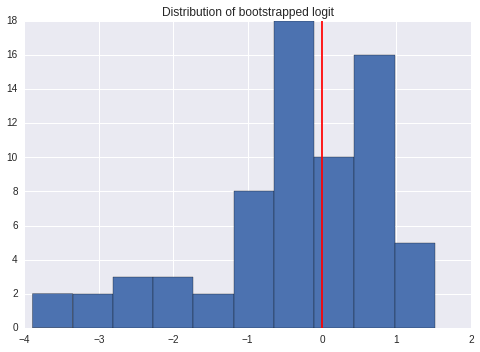

In [47]:
# Step 5: define relative frequency
# topic: probability of backtest overfitting
df.logit.replace([np.inf, -np.inf], np.nan).dropna().hist(bins=10)#title='Distribution of logit'
plt.axvline(0, color='red')
plt.title('Distribution of bootstrapped logit')df.lo
pbo = sum(df.logit < 0)/float(len(df.logit))
print "[Probability of Backtest Overfitting] %s " % pbo

### Step 6: hypothesis test
* $H_0$: the strategy selection process is backtest overfitting
* $\lambda_c$ ~ asymtopic Normal distribution
* PBO < 0.05, reject the $H_0$

## Other tools to evaluate backtest overfitting by the CSCV
1. Probability of backtest overfitting
2. Performance degradation
3. Probability of Loss
4. Stochastic dominance

[Probability of loss] 0.557142857143


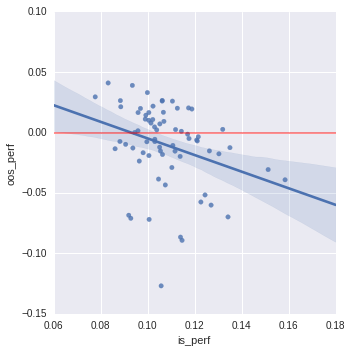

In [61]:
# topic: performance degradation & probability of loss
sns.lmplot("is_perf", "oos_perf", df) # negative slope
plt.axhline(0, color='red', alpha=0.5)

pl = sum(df.oos_perf < 0)/float(len(df.oos_perf))
print "[Probability of loss] %s" % pl

In [62]:
# Topic: stochastic dominance
# does this strategy selection  process is better than random strategy selection